In [123]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# randomizedSearchCV 

### Importing training and testing data sets, eploratory analysis of features

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head() # display a few samples

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
3,3.932,3.2512,0,0.0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2
5,4.236,3.3944,0,0.0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,2
6,4.236,3.4286,0,0.0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,2
7,5.000,5.0476,1,0.0,0,0,0,11.1,0,3,...,0,0,1,4.712,4.583,0,9.303,0,0,2
8,4.525,3.8301,0,0.0,0,0,0,31.6,3,2,...,0,0,0,3.379,2.143,0,7.950,0,0,2


V1 379; V2 823; V3 11; V4 4; V5 16; V6 10; V7 14; V8 172; V9 15; V10 11; V11 21; V12 307; V13 638; V14 321; V15 436; V16 24; V17 158; V18 115; V19 2; V20 4; V21 3; V22 322; V23 13; V24 2; V25 2; V26 3; V27 291; V28 174; V29 3; V30 372; V31 468; V32 8; V33 11; V34 16; V35 8; V36 603; V37 536; V38 8; V39 711; V40 5; V41 16; Class 2; 

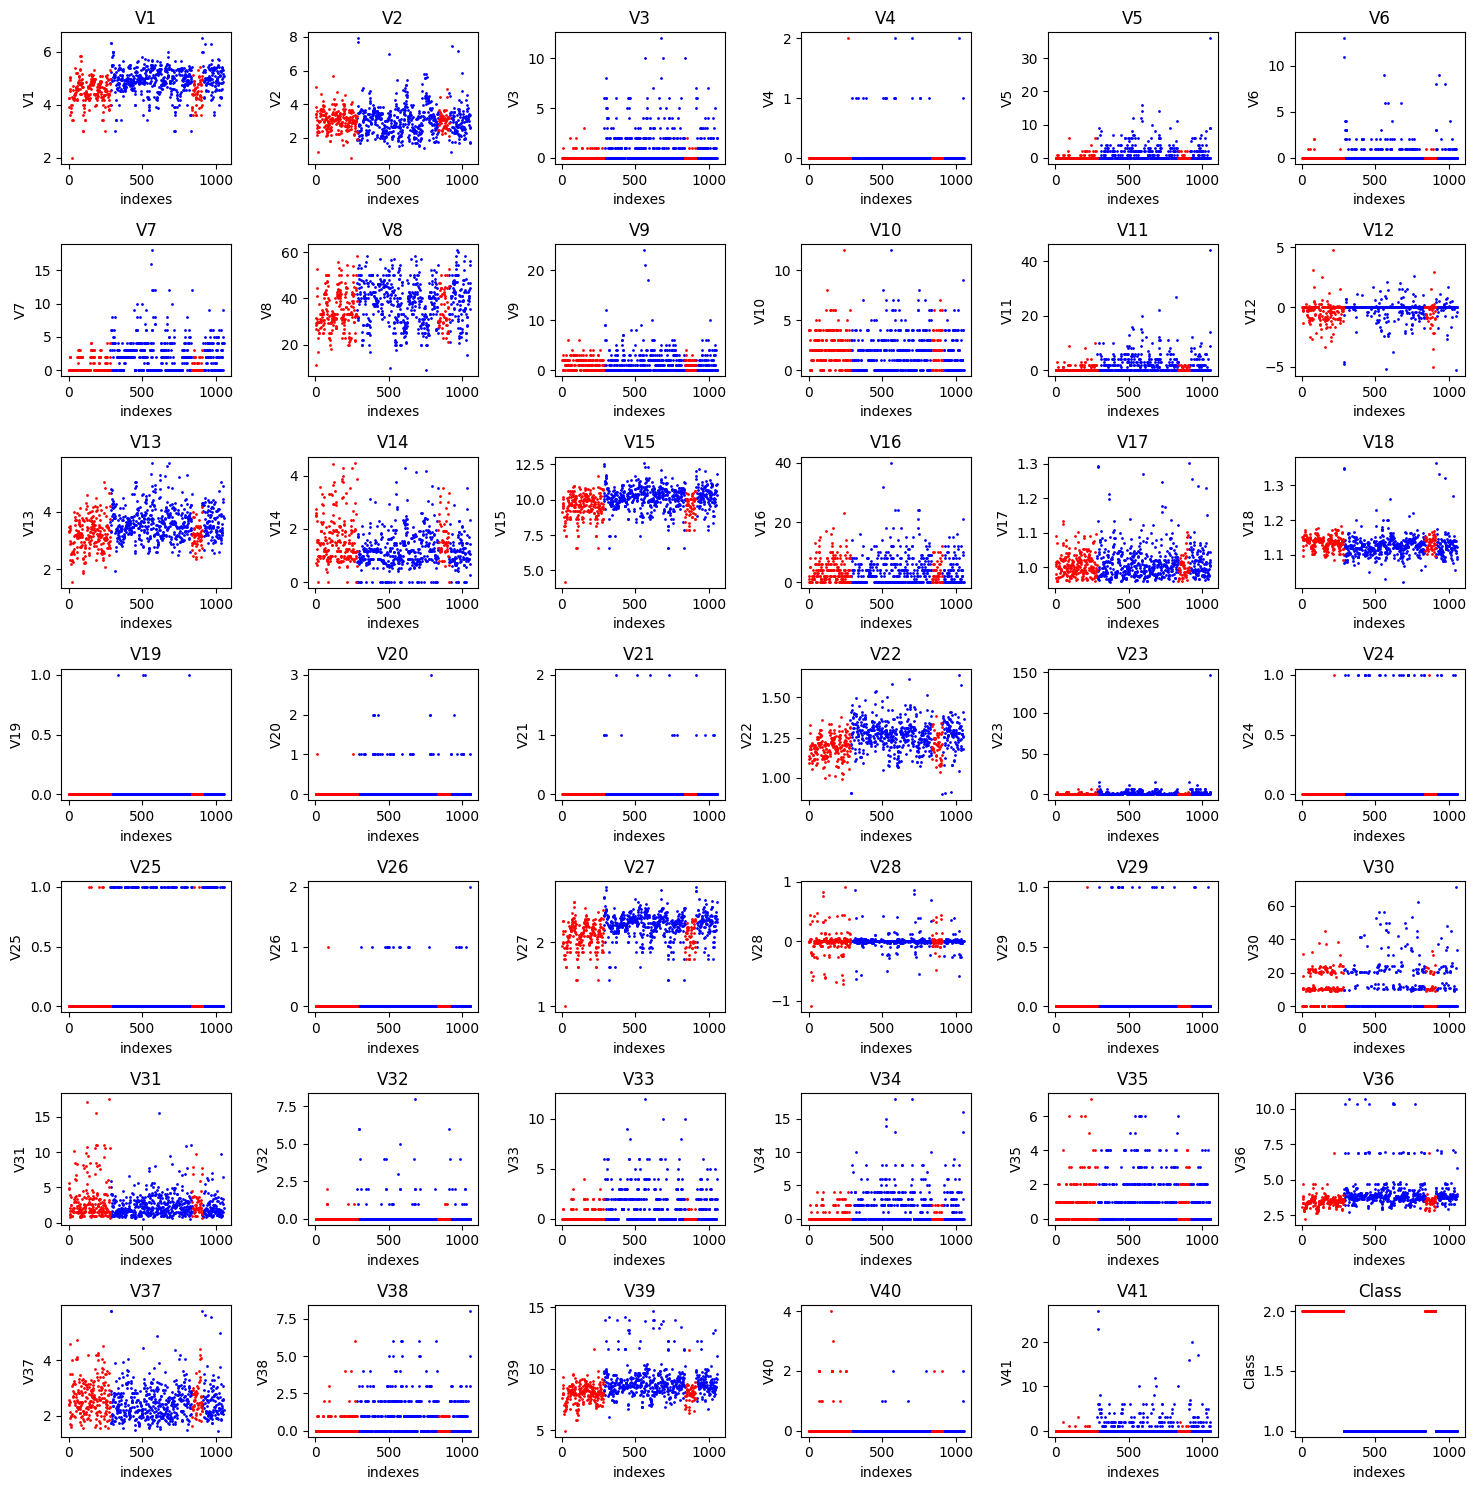

In [3]:
f = plt.figure(figsize=(15, 15))

for i, col in enumerate(train.columns):
    print(col, len(train[col].unique()), end="; ")
    f.add_subplot(7, 6, i+1)
    plt.title(col)
    plt.ylabel(col)
    plt.xlabel("indexes")
    plt.tight_layout()
    plt.plot(train[col][train['Class'] == 1], "bo", markersize="1")
    plt.plot(train[col][train['Class'] == 2], "ro", markersize="1")

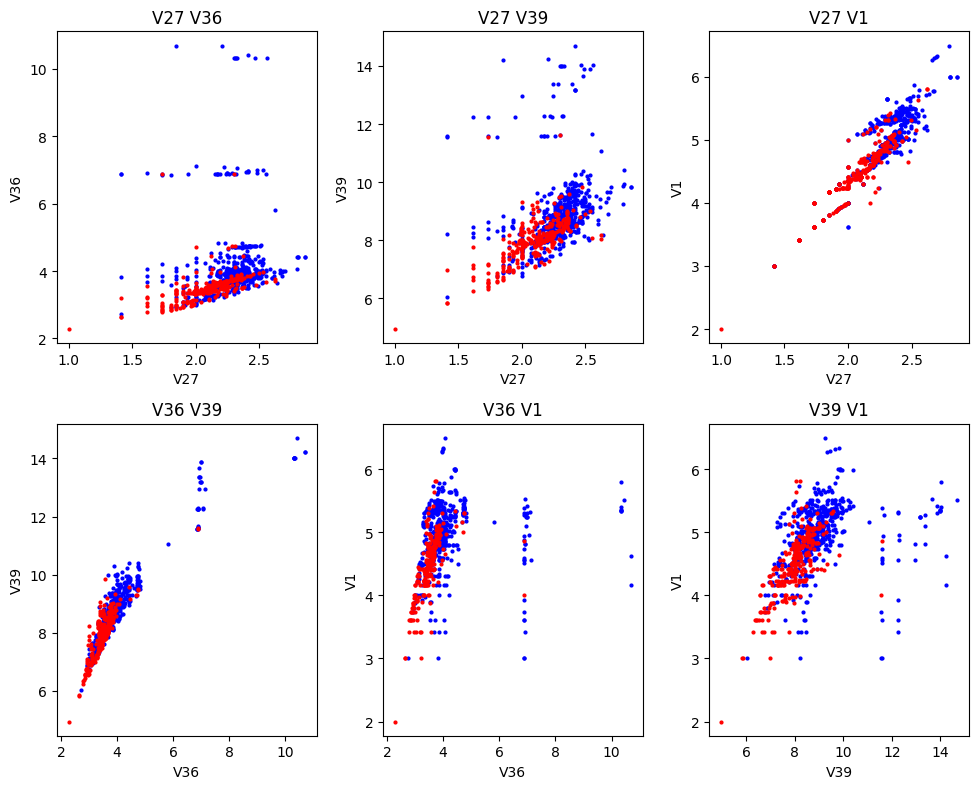

In [4]:
f = plt.figure(figsize=(10, 8))

b = [26, 35, 38, 0]
a = train.columns[b]

counter = 1
for i, col in enumerate(a):
    for j, col2 in enumerate(a[i+1:]):
        f.add_subplot(2, 3, counter)
        plt.title(col + " " + col2)
        plt.ylabel(col2)
        plt.xlabel(col)
        plt.tight_layout()
        plt.plot(train[col][train['Class'] == 1], train[col2][train['Class'] == 1], "bo", markersize="2")
        plt.plot(train[col][train['Class'] == 2], train[col2][train['Class'] == 2], "ro", markersize="2")
        counter += 1

plt.show()

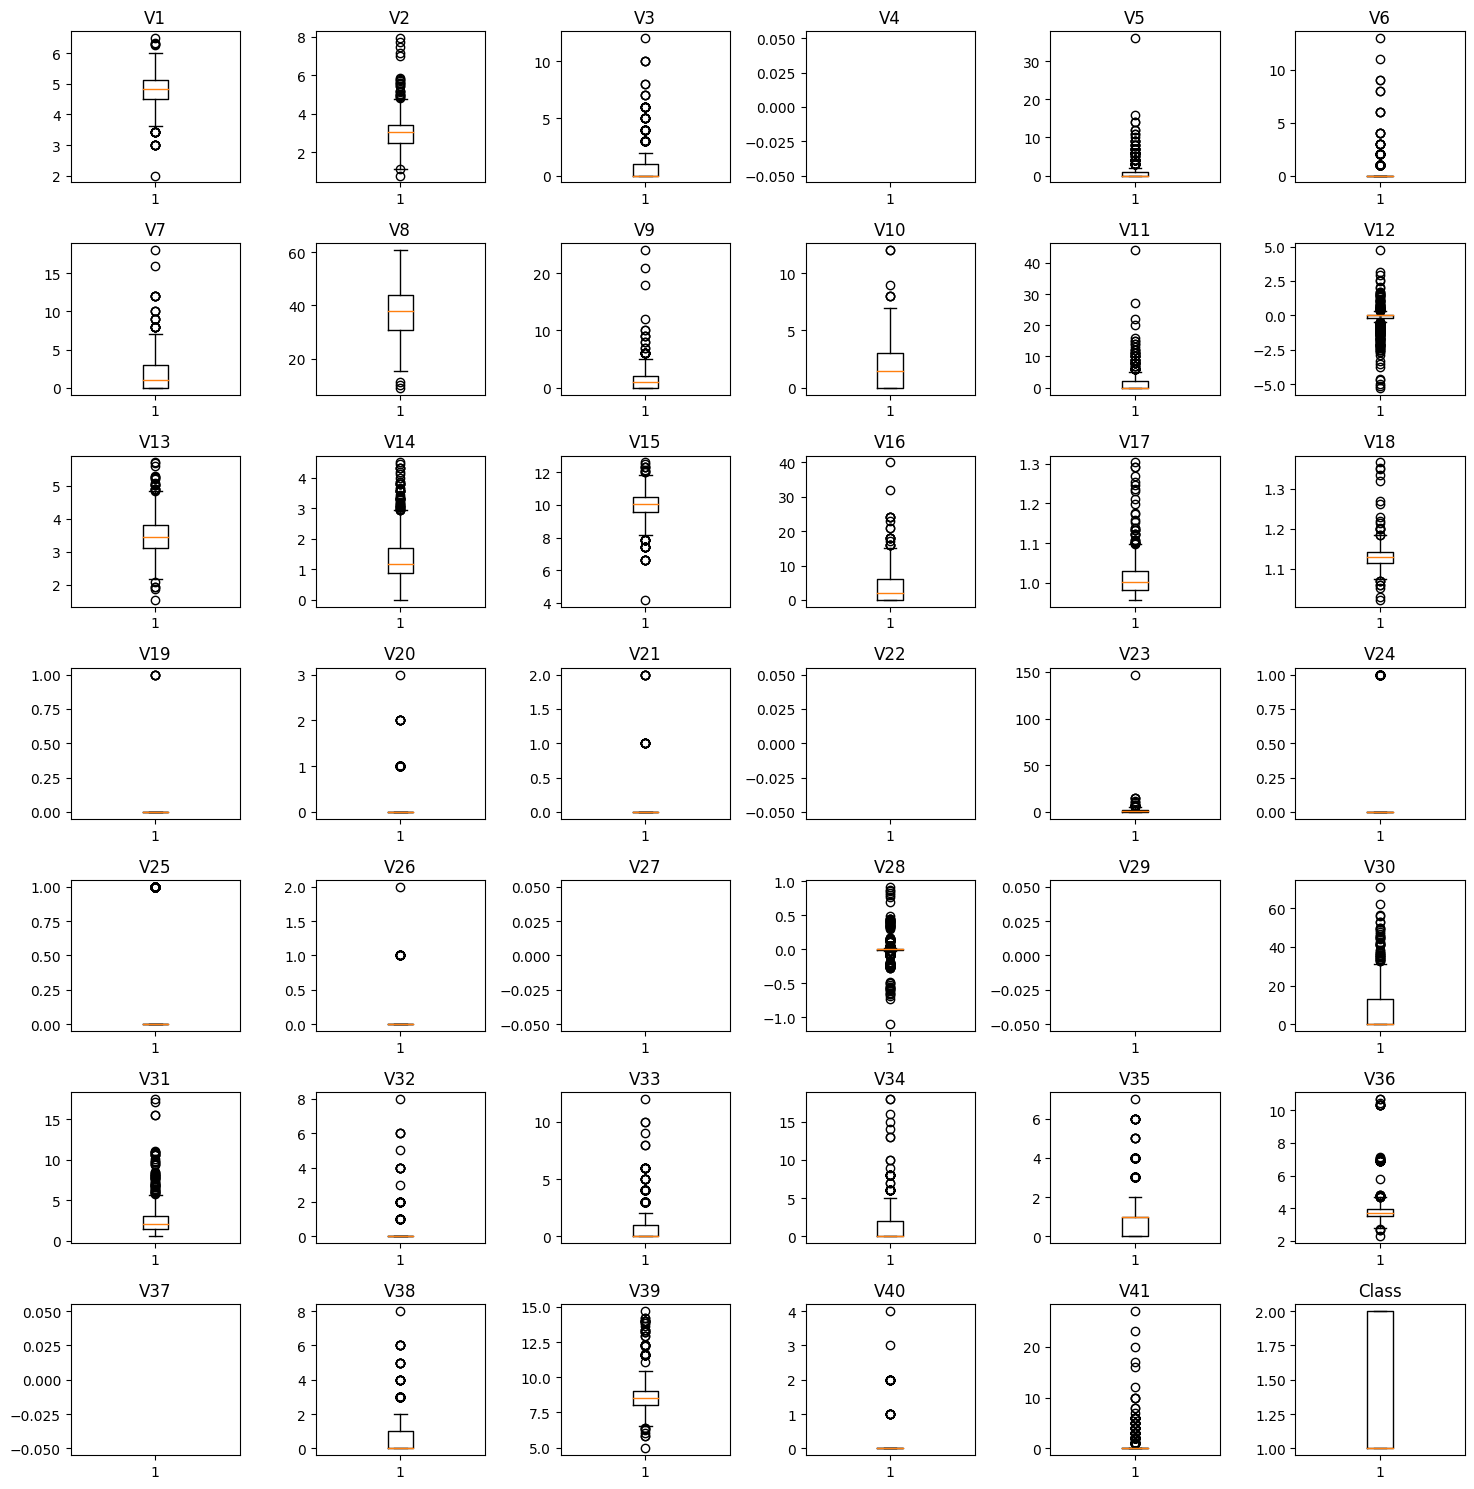

In [5]:
f = plt.figure(figsize=(15, 15))

for i, col in enumerate(train.columns):
    f.add_subplot(7, 6, i+1)
    plt.title(col)
    plt.tight_layout()
    plt.boxplot(train[col])

2.1 Exploration

Inspect the dataset. How balanced is the target variable? Are there any missing values present? If there
are, choose a strategy that takes this into account.
Most of your data is of the numeric type. Can you identify, by adopting exploratory analysis, whether
some features are directly related to the target? What about feature pairs? Produce at least three types of
visualizations of the feature space and be prepared to argue why these visualizations were useful for your
subsequent analysis.

Target variable distributions in test and training sets are close to [2/3 1/3].

Yes, there are some missing values. One possible strategy is to drop those that don't have all values. Some classifiers however don't really need all information, so you can just ignore missing rows for that specific attributes.

The visualizations are above. I haven't found anything very concrete some of the features are more and some less releted to target.

### Majority classifier

In [6]:
majority = train['Class'].value_counts()
majorityArr = np.array(majority)
print("Class distribution (train)")
print(majority)
print("Percentage:")
print(np.array(majorityArr[0] / np.sum(majorityArr)))

majorityTest = test['Class'].value_counts()
majorityTestArr = np.array(majorityTest)
print("Class distribution (test)")
print(majorityTest)
print("Percentage:")
print(np.array(majorityTestArr[0] / np.sum(majorityTestArr)))

Class distribution (train)
1    564
2    282
Name: Class, dtype: int64
Percentage:
0.6666666666666666
Class distribution (test)
1    135
2     74
Name: Class, dtype: int64
Percentage:
0.645933014354067


### Random classifier

There are two classes if we choose between them randomly accuracy is 1/2

### Preprocessing

In [7]:
# removing NA values from train dataframe
train = train.dropna()
# Separate input features (X) and target variable (y)
y = train.Class
X = train.drop('Class', axis=1)

testY = test.Class
testX = test.drop('Class', axis=1)

# le = LabelEncoder()
# y = le.fit_transform(y)
# testY = le.fit_transform(testY)


### Decision tree

In [8]:
clf_decitionTree = DecisionTreeClassifier(random_state=0)
clf_decitionTree.fit(X, y)

pred_y_decitionTree = clf_decitionTree.predict(testX)
print(accuracy_score(testY, pred_y_decitionTree))
prob_y_decisionTree = clf_decitionTree.predict_proba(testX)
prob_y_decisionTree = [p[1] for p in prob_y_decisionTree]
print(roc_auc_score(testY, prob_y_decisionTree))
print(f1_score(testY, pred_y_decitionTree))
print(precision_score(testY, pred_y_decitionTree))
print(recall_score(testY, pred_y_decitionTree))

0.8181818181818182
0.8043043043043043
0.8582089552238805
0.8646616541353384
0.8518518518518519


### KNN

In [9]:
clf_knn = KNeighborsClassifier(n_neighbors=9)
clf_knn.fit(X, y)

pred_y_knn = clf_knn.predict(testX)
print(accuracy_score(testY, pred_y_knn))
prob_y_knn = clf_knn.predict_proba(testX)
prob_y_knn = [p[1] for p in prob_y_knn]
print(roc_auc_score(testY, prob_y_knn))
print(f1_score(testY, pred_y_knn))
print(precision_score(testY, pred_y_knn))
print(recall_score(testY, pred_y_knn))

0.7894736842105263
0.8444944944944945
0.8307692307692307
0.864
0.8


### SVC / SVM

In [10]:
clf_svc = SVC(kernel='linear',  class_weight='balanced', probability=True)
clf_svc.fit(X, y)

pred_y_svc = clf_svc.predict(testX)
print(accuracy_score(testY, pred_y_svc))
prob_y_svc = clf_svc.predict_proba(testX)
prob_y_svc = [p[1] for p in prob_y_svc]
print(roc_auc_score(testY, prob_y_svc))
print(f1_score(testY, pred_y_svc))
print(precision_score(testY, pred_y_svc))
print(recall_score(testY, pred_y_svc))

0.8564593301435407
0.917917917917918
0.8846153846153846
0.92
0.8518518518518519


### Random forest

In [103]:
clf_randomForest = RandomForestClassifier(random_state=1234)
clf_randomForest.fit(X, y)
pred_y_randomForest = clf_randomForest.predict(testX)
print(accuracy_score(testY, pred_y_randomForest))
prob_y_randomForest = clf_randomForest.predict_proba(testX)
prob_y_randomForest = [p[1] for p in prob_y_randomForest]
print(roc_auc_score(testY, prob_y_randomForest))
print(f1_score(testY, pred_y_randomForest))
print(precision_score(testY, pred_y_randomForest))
print(recall_score(testY, pred_y_randomForest))

0.8373205741626795
0.925025025025025
0.8740740740740742
0.8740740740740741
0.8740740740740741


### Ada boost

In [28]:
clf_adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2)
clf_adaboost.fit(X, y)

pred_y_adaboost = clf_adaboost.predict(testX)
print(accuracy_score(testY, pred_y_adaboost))
prob_y_adaboost = clf_adaboost.predict_proba(testX)
prob_y_adaboost = [p[1] for p in prob_y_adaboost]
print(roc_auc_score(testY, prob_y_adaboost))
print(f1_score(testY, pred_y_adaboost))
print(precision_score(testY, pred_y_adaboost))
print(recall_score(testY, pred_y_adaboost))

0.8516746411483254
0.8983483483483484
0.8888888888888888
0.8611111111111112
0.9185185185185185


In [72]:
def printScores(scores):
    avgAccuracy = np.mean(scores['test_accuracy'])
    stdAccuracy = np.std(scores['test_accuracy'])
    avgF1 = np.mean(scores['test_f1_macro'])
    stdF1 = np.std(scores['test_f1_macro'])
    avgRecall = np.mean(scores['test_recall_macro'])
    stdRecall = np.std(scores['test_recall_macro'])
    avgAUC = np.mean(scores['test_roc_auc'])
    stdAUC = np.std(scores['test_roc_auc'])
    print(f"Precision average {avgAccuracy} with standard deviation {stdAccuracy}")
    print(f"F1 average {avgF1} with standard deviation {stdF1}")
    print(f"Recall average {avgRecall} with standard deviation {stdRecall}")
    print(f"AUC average {avgAUC} with standard deviation {stdAUC}")
    return avgAccuracy, avgF1, avgRecall, avgAUC

In [104]:
scoring = ['accuracy', 'f1_macro', 'recall_macro', 'roc_auc']
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1234)

print("DecisionTree:")
scores = cross_validate(clf_decitionTree, X, y, cv=rkf.split(X), scoring=scoring)
accDT, f1DT, recallDT, aucDT = printScores(scores)
print("KNN:")
scores = cross_validate(clf_knn, X, y, cv=rkf.split(X), scoring=scoring)
accKNN, f1KNN, recallKNN, aucKNN = printScores(scores)
print("SVC:")
scores = cross_validate(clf_svc, X, y, cv=rkf.split(X), scoring=scoring)
accSVC, f1SVC, recallSVC, aucSVC = printScores(scores)
print("Random forest:")
scores = cross_validate(clf_randomForest, X, y, cv=rkf.split(X), scoring=scoring)
accRF, f1RF, recallRF, aucRF = printScores(scores)
print("Ada boost:")
scores = cross_validate(clf_adaboost, X, y, cv=rkf.split(X), scoring=scoring)
accAB, f1AB, recallAB, aucAB = printScores(scores)

accArr = np.array([accDT, accKNN, accSVC, accRF, accAB])
f1Arr = np.array([f1DT, f1KNN, f1SVC, f1RF, f1AB])
recallArr = np.array([recallDT, recallKNN, recallSVC, recallRF, recallAB])
aucArr = np.array([aucDT, aucKNN, aucSVC, aucRF, aucAB])



DecisionTree:
Precision average 0.812156862745098 with standard deviation 0.02854376403060423
F1 average 0.784408516342152 with standard deviation 0.03202103986272087
Recall average 0.7846760605124242 with standard deviation 0.032710517604903296
AUC average 0.7846760605124244 with standard deviation 0.0327105176049033
KNN:
Precision average 0.8037908496732026 with standard deviation 0.03176470588235294
F1 average 0.7830756361992742 with standard deviation 0.03501761634187004
Recall average 0.7948762190469268 with standard deviation 0.03443701598610628
AUC average 0.8695242325608025 with standard deviation 0.029821877354123717
SVC:
Precision average 0.8483660130718953 with standard deviation 0.02449018822901332
F1 average 0.8334307934166105 with standard deviation 0.025822140023746137
Recall average 0.8494180778534464 with standard deviation 0.02297552655916109
AUC average 0.9172983682699644 with standard deviation 0.021409121779670134
Random forest:
Precision average 0.8722875816993464

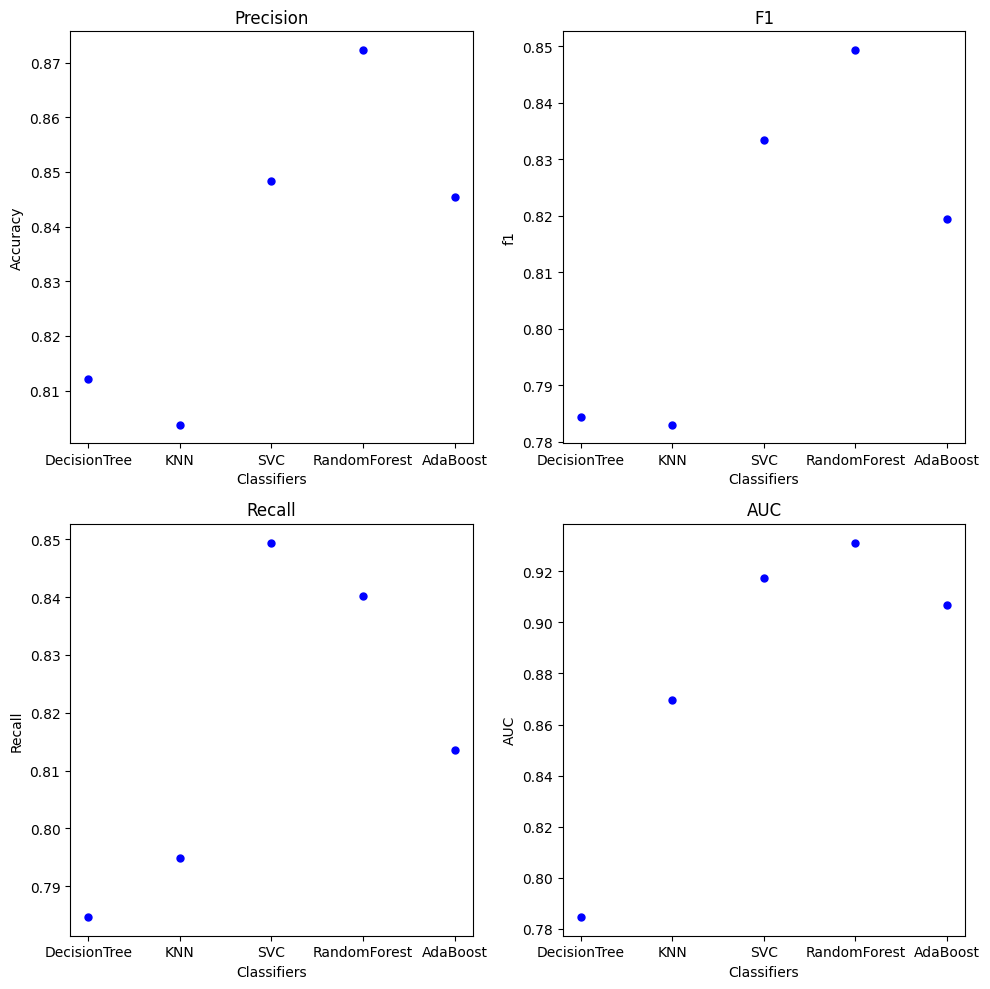

In [87]:
xAxis = ['DecisionTree', 'KNN', 'SVC', 'RandomForest', 'AdaBoost']
f = plt.figure(figsize=(10, 10))
f.add_subplot(2, 2, 1)
plt.title("Precision")
plt.ylabel("Accuracy")
plt.xlabel("Classifiers")
plt.tight_layout()
plt.plot(xAxis, accArr, "bo", markersize="5")

f.add_subplot(2, 2, 2)
plt.title("F1")
plt.ylabel("f1")
plt.xlabel("Classifiers")
plt.tight_layout()
plt.plot(xAxis, f1Arr, "bo", markersize="5")

f.add_subplot(2, 2, 3)
plt.title("Recall")
plt.ylabel("Recall")
plt.xlabel("Classifiers")
plt.tight_layout()
plt.plot(xAxis, recallArr, "bo", markersize="5")

f.add_subplot(2, 2, 4)
plt.title("AUC")
plt.ylabel("AUC")
plt.xlabel("Classifiers")
plt.tight_layout()
plt.plot(xAxis, aucArr, "bo", markersize="5")

Comment on the performance of algorithms and visualize their final scores. How do they perform against
the random baseline? What about the constant one? How do different learning scenarios impact the final
score? Are the differences between the models statistically significant?

Random forest performed the best then SVC and AdaBoost. DecisionTree and KNN performed significantly worse than others. They all perform better than random and constant baseline (50%/66% accuracy). Different parameters will change final scores and also different preprocessing of data might improve the final score (less noise/outliers, more accurate data,...). Differences of the RandomForest, SVC, AdaBoost are not very big, but depending on the needs of the classification different classification model might be more desirable.

### Paramaters tuning (Random forest)

In [140]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4, scoring='f1')
rf_Grid.fit(X, y)
rf_Grid.best_params_
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4, scoring='f1')
rf_RandomGrid.fit(X, y)
rf_RandomGrid.best_params_

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 33,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [141]:
print (f'Train Accuracy - : {rf_Grid.score(X,y):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(testX,testY):.3f}')
print (f'Train Accuracy - : {rf_RandomGrid.score(X,y):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(testX,testY):.3f}')

Train Accuracy - : 0.918
Test Accuracy - : 0.861
Train Accuracy - : 0.934
Test Accuracy - : 0.860


### Parameter tuning (AdaBoost)

In [132]:
adaBoostModel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

adaBoost_Grid = GridSearchCV(adaBoostModel, parameters,verbose=3,scoring='f1',n_jobs=-1)
adaBoost_Grid.fit(X,y)
adaBoost_Grid.best_params_
adaBoost_RandomGrid = RandomizedSearchCV(estimator = adaBoostModel, param_distributions = parameters, cv = 5, verbose=2, n_jobs = 4, scoring='f1')
adaBoost_RandomGrid.fit(X, y)
adaBoost_RandomGrid.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 250,
 'learning_rate': 0.1,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__max_depth': 4}

In [134]:
print (f'Train Accuracy - : {adaBoost_Grid.score(X,y):.3f}')
print (f'Test Accuracy - : {adaBoost_Grid.score(testX,testY):.3f}')
print (f'Train Accuracy - : {rf_RandomGrid.score(X,y):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(testX,testY):.3f}')

Train Accuracy - : 0.998
Test Accuracy - : 0.887
Train Accuracy - : 0.919
Test Accuracy - : 0.853


In [138]:
from scipy import stats

svcModel = SVC(kernel='linear',  class_weight='balanced', probability=True)
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
 
svcGrid_search = GridSearchCV(svcModel, param_grid = grid_list, n_jobs = 4, cv = 3, scoring='f1') 
svcGrid_search.fit(X, y) 
svcGrid_search.best_params_
 
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
              
svcRand_search = RandomizedSearchCV(svcModel, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring='f1') 
svcRand_search.fit(X, y) 
svcRand_search.best_params_

{'C': 6.479197998006022, 'gamma': 0.22054161556730448}

In [139]:
print (f'Train Accuracy - : {svcGrid_search.score(X,y):.3f}')
print (f'Test Accuracy - : {svcGrid_search.score(testX,testY):.3f}')
print (f'Train Accuracy - : {svcRand_search.score(X,y):.3f}')
print (f'Test Accuracy - : {svcRand_search.score(testX,testY):.3f}')

Train Accuracy - : 0.911
Test Accuracy - : 0.869
Train Accuracy - : 0.913
Test Accuracy - : 0.893
